In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hfd_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/HFD_All_Epochs/'
hurst_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/Hurst_All_Epochs/'
entr_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/DispEn/'
test_num_epochs = '/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/'

In [3]:
patient_list  =  ['P1 N1', 'P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P4 N1', 'P4 N2', 'P5 N1',
                  'P6 N1', 'P6 N2', 'P7 N1', 'P7 N2','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N2', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                  'P28 N2', 'P29 N2', 'P30 N1'] 

In [5]:
all_patients = []
for patient in patient_list:
    print(patient)
    dispen_ls = []
    for file in os.listdir(entr_dir): 
        if file.startswith(patient):
            channel = file.split('_')[1]
            if channel == 'N2':
                channel = file.split('_')[2]
                dispen_file = np.load(entr_dir + file).flatten()
                dispen_dict = {'Channel': [str(channel)] * len(dispen_file), 'dispen': dispen_file}
                dispen_df = pd.DataFrame(data=dispen_dict)
                dispen_ls.append(dispen_df)    
            else:
                channel = file.split('_')[1]
                dispen_file = np.load(entr_dir + file).flatten()
                dispen_dict = {'Channel': [str(channel)] * len(dispen_file), 'dispen': dispen_file}
                dispen_df = pd.DataFrame(data=dispen_dict)
                dispen_ls.append(dispen_df) 
    patient_dispen_df = pd.concat(dispen_ls, axis=0).reset_index()
    patient_id_df = pd.DataFrame(data = {'Patient': [patient] * len(patient_dispen_df)}).reset_index()
    patient_concat = pd.concat([patient_id_df, patient_dispen_df], axis = 1)
    dispen_dup = patient_concat.loc[:, ~patient_concat.columns.duplicated()]
    all_patients.append(dispen_dup)


P1 N1
P2 N1
P2 N2
P3 N1
P3 N2
P4 N1
P4 N2
P5 N1
P6 N1
P6 N2
P7 N1
P7 N2
P8 N1
P10 N1
P11 N1
P15 N1
P16 N1
P17 N1
P18 N1
P20 N1
P21 N1
P21 N2
P21 N3
P22 N1
P23 N1
P23 N2
P23 N3
P24 N1
P27 N1
P28 N1
P28 N2
P29 N2
P30 N1


In [6]:
all_patients_concat = pd.concat(all_patients, axis = 0)
all_patients_concat

,index,Patient,Channel,dispen
0,0,P1 N1,01,1.192180
1,1,P1 N1,01,2.311847
2,2,P1 N1,01,2.246001
3,3,P1 N1,01,2.275855
4,4,P1 N1,01,2.241409
...,...,...,...,...
1033,1033,P30 N1,C3,1.669506
1034,1034,P30 N1,C3,1.883086
1035,1035,P30 N1,C3,2.043802
1036,1036,P30 N1,C3,2.299680


In [11]:
np.unique(all_patients_concat['Channel'])

array(['01', 'C3', 'E1', 'E2', 'F3', 'M2'], dtype=object)

In [12]:
genotype_human = {'P1': 'WT', 'P2': 'GAP', 'P3': 'GAP', 'P4': 'WT', 
                  'P5': 'GAP', 'P6': 'GAP', 'P7': 'GAP', 'P8' : 'WT',
                  'P9': 'GAP', 'P10': 'GAP', 'P11': 'WT', 'P12': 'WT',
                  'P13': 'GAP', 'P14': 'WT', 'P15': 'GAP', 'P16': 'GAP',
                  'P17': 'WT', 'P18': 'WT', 'P19': 'WT', 'P20': 'GAP',
                  'P21': 'WT', 'P22': 'GAP', 'P23': 'GAP', 'P24': 'WT',
                  'P25': 'WT', 'P26': 'GAP', 'P27': 'WT', 'P28': 'WT',
                  'P29': 'WT', 'P30': 'GAP'} 

In [13]:
all_patients_concat['Genotype'] = all_patients_concat['Patient'].apply(lambda x: genotype_human.get(x.split()[0], 'Unknown'))

In [14]:
mean_df = all_patients_concat.groupby(["Patient", "Channel", "Genotype"])["dispen"].mean().reset_index()
# Define the desired order of frequencies

In [15]:
## Order rows
#mean_df = mean_df.groupby(["Patient", "Channel", "Genotype"])["hfd"].mean().reset_index()

# Define the desired order of frequencies
desired_order = ['01', 'C3', 'E1', 'E2', 'F3', 'M2']

# Create a Categorical data type with the desired order
category_order = pd.Categorical(mean_df['Channel'], categories=desired_order, ordered=True)

# Assign the Categorical data type to the 'Frequency' column
mean_df['Channel'] = category_order

# Sort the DataFrame based on the 'Frequency' column
sorted_df = mean_df.sort_values(['Patient', 'Channel', 'Genotype'])
sorted_df

,Patient,Channel,Genotype,dispen
0,P1 N1,01,WT,2.161026
1,P1 N1,C3,WT,2.120506
2,P1 N1,E1,WT,2.433558
3,P1 N1,E2,WT,1.979364
4,P1 N1,F3,WT,2.060215
...,...,...,...,...
193,P8 N1,C3,WT,2.510133
194,P8 N1,E1,WT,2.823480
195,P8 N1,E2,WT,2.443404
196,P8 N1,F3,WT,2.493241


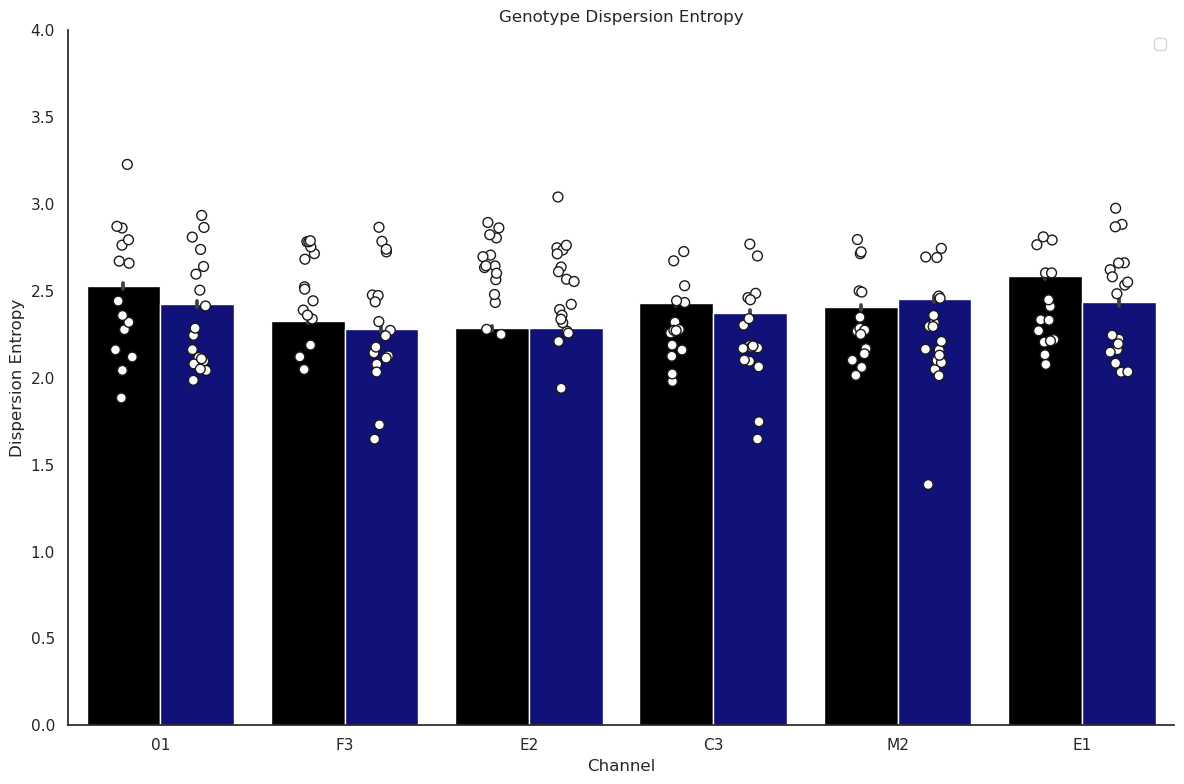

In [16]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Channel", y="dispen", hue="Genotype", data=all_patients_concat, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Channel")
plt.ylabel("Dispersion Entropy")
plt.title("Genotype Dispersion Entropy")
plt.ylim(0, 4.0)

stripplot = sns.stripplot(x="Channel",y="dispen",hue="Genotype",data=mean_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

# Remove the legend
plt.legend(labels=[])

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/Plots/')
plt.savefig("genotype_dispen.png", dpi=300, bbox_inches="tight")
plt.savefig("genotype_dispen.svg", dpi=300, bbox_inches="tight")
plt.show()